In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")
%matplotlib inline

In [2]:
df=pd.read_csv("C:\\Users\\Welcome\\Desktop\\ML\\logistic project self.csv")

In [3]:
df.head()

,test1,test2,result
0,34,56,0
1,55,76,1
2,45,78,0
3,34,77,0
4,60,45,1


In [4]:
score=df[['test1','test2']].values

In [5]:
output=df['result'].values

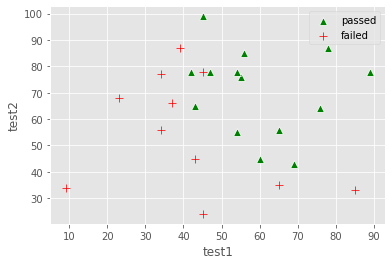

In [6]:
passed=(output==1).reshape(25,1)
failed=(output==0).reshape(25,1)
ax=sns.scatterplot(x=score[passed[:,0],0],
                  y=score[passed[:,0],1],
                  marker='^',
                  color='green',
                   s=60)
sns.scatterplot(x=score[failed[:,0],0],
                  y=score[failed[:,0],1],
                  marker='+',
                  color='red',
                   s=60) 
ax.set(xlabel='test1',ylabel='test2')  
ax.legend(['passed','failed'])
plt.show()

In [7]:
def logistic_fn(x):
    return 1/(1+np.exp(-x))

In [8]:
logistic_fn(0)

0.5

In [9]:
logistic_fn(1)

0.7310585786300049

In [10]:
def cost_fn(theta,x,y):
    m=len(y)
    y_pred = logistic_fn(np.dot(x,theta))
    error = (y * np.log(y_pred)) + (1-y)*np.log(1-y_pred)
    cost = -1 / m * sum(error)
    gradient = 1 / m * np.dot(x.transpose(),(y_pred-y))
    return cost[0],gradient

In [11]:
mean_score=np.mean(score,axis=0)
std_score=np.std(score,axis=0)
score=(score-mean_score)/std_score

In [12]:
row=score.shape[0]
col=score.shape[1]

In [13]:
x = np.append(np.ones((row,1)),score,axis=1)

In [14]:
y = output.reshape(row,1)

In [15]:
theta_init=np.zeros((col+1,1))
cost,gradient=cost_fn(theta_init,x,y)
print('cost at starting',cost)

cost at starting 0.6931471805599452


In [16]:
print('gradient at starting',gradient)

gradient at starting [[-0.06      ]
 [-0.23614579]
 [-0.19608404]]


In [17]:
def gradient_descent(theta,x,y,alpha,iteration):
    costs=[]
    for i in range(iteration):
        cost,gradient=cost_fn(theta,x,y)
        theta-=(alpha*gradient)
        costs.append(cost)
    return theta,costs    

In [18]:
theta,costs=gradient_descent(theta_init,x,y,1,300)

In [19]:
print('theta after gradient_descent',theta)
print('cost after gradient descent',costs[-1])

theta after gradient_descent [[0.33689363]
 [2.27434968]
 [1.76729149]]
cost after gradient descent 0.4082670045197649


Text(0.5, 1.0, 'logistic regression')

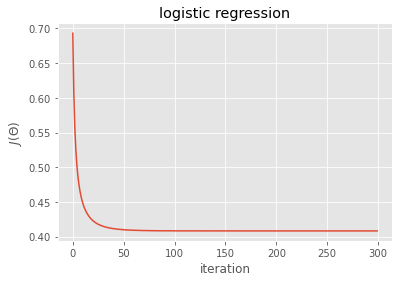

In [20]:
plt.plot(costs)
plt.xlabel('iteration')
plt.ylabel('$J(\Theta)$')
plt.title('logistic regression')

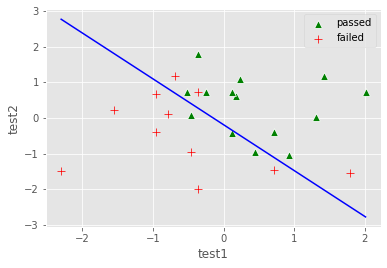

In [24]:
ax=sns.scatterplot(x=x[passed[:,0],1],
                  y=x[passed[:,0],2],
                  marker='^',
                  color='green',
                   s=60)
sns.scatterplot(x=x[failed[:,0],1],
                  y=x[failed[:,0],2],
                  marker='+',
                  color='red',
                   s=60) 
ax.set(xlabel='test1',ylabel='test2')  
ax.legend(['passed','failed'])

x_boundary=np.array([np.min(x[:,1]),np.max(x[:,1])])
y_boundary=-(theta[0]+theta[1]*x_boundary)/theta[2]
sns.lineplot(x=x_boundary,y=y_boundary,color='blue')
plt.show()



In [29]:
def predict(theta,x):
    result=x.dot(theta)
    return result>0


In [30]:
p=predict(theta,x)
print(sum(p==y)[0])

19


In [31]:
test=np.array([50,70])
test=(test-mean_score)/std_score
test=np.append(np.ones(1),test)
prob=logistic_fn(test.dot(theta))
prob[0]

0.6692575175133169